# [作業目標]
- 利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

# [作業重點]
- 練習創立 DataFrame (In[2])
- 如何取出口數最多的國家 (In[3], Out[3])

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [16]:
import pandas as pd
import numpy as np

In [43]:
data = {'國家':['Country_1', 'Country_2'] ,
        '人口':[np.random.randint(100, 1000), np.random.randint(100, 1000)] }
data = pd.DataFrame(data)
print(data)

          國家   人口
0  Country_1  814
1  Country_2  906


In [44]:
data[data['人口'].isin([data['人口'].max()])]

,國家,人口
1,Country_2,906


In [1]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [2]:
import requests
response = requests.get(target_url)
data = response.text

# 用 request 傳送回來的資料不會認得斷行符號"
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [3]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
split_tag = '\n'

data = data.replace('\t', ',').split(split_tag)
print(len(data))

9996


In [4]:
import pandas as pd
df = pd.DataFrame(data, columns = ['ImgName'])

In [5]:
df['fileNname'] = df['ImgName'].str.split(',').str[0]
df['path'] = df['ImgName'].str.split(',').str[1]
df = df.drop(['ImgName'], axis = 1)
df = df.dropna()
df

,fileNname,path
0,n00015388_157,http://farm1.static.flickr.com/145/430300483_2...
1,n00015388_238,http://farm2.static.flickr.com/1005/3352960681...
2,n00015388_304,http://farm1.static.flickr.com/27/51009336_a96...
3,n00015388_327,http://farm4.static.flickr.com/3025/2444687979...
4,n00015388_355,http://img100.imageshack.us/img100/3253/forres...
...,...,...
9990,n00433802_5197,http://grfx.cstv.com/photos/schools/afa/sports...
9991,n00433802_5202,http://farm2.static.flickr.com/1130/960179413_...
9992,n00433802_5204,http://static.flickr.com/150/387324732_f8149d0...
9993,n00433802_5208,http://3.bp.blogspot.com/_9T2cRtlgHV0/SK55RHay...


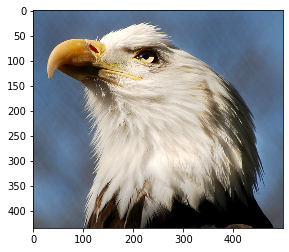

In [6]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0, 'path']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [7]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    img_list = []
    for i in range(0, len(url_list)):
        try:
            response = requests.get(url_list[i])
            img = Image.open(BytesIO(response.content))
            if resize:
                img = img.resize((256, 256))
            img_list.append(img)
        except Exception:
            print(Exception)
    return img_list

<class 'Exception'>
<class 'Exception'>
Total images that we got: 4 


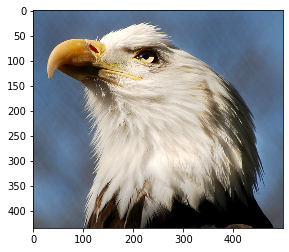

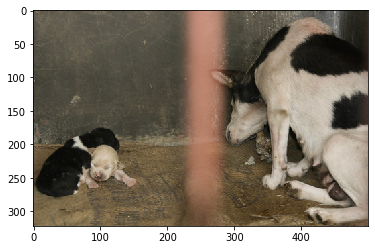

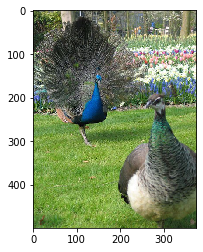

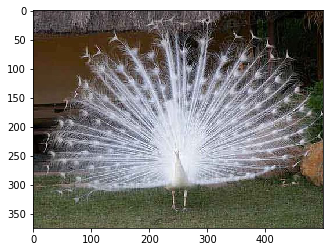

In [8]:
result = img2arr_fromURLs(df.loc[0:5, 'path'].tolist())
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()

<class 'Exception'>
<class 'Exception'>
Total images that we got: 4 


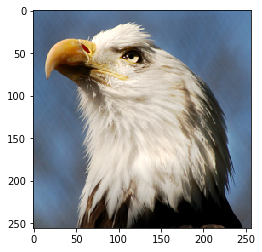

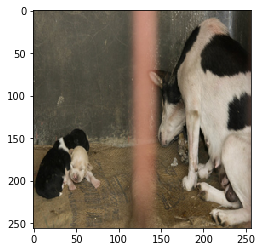

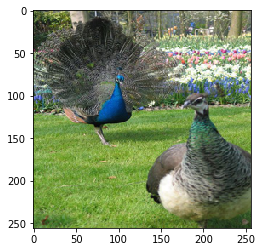

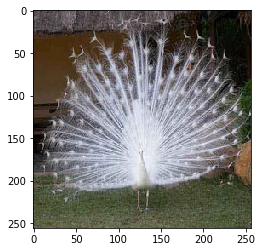

In [9]:
result = img2arr_fromURLs(df.loc[0:5, 'path'].tolist(), True)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()